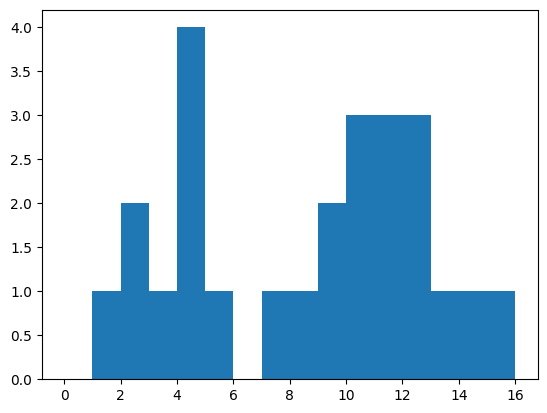

Mean: 8.12
Median: 9.0
Mode: 4
Variance: 16.7456


In [5]:
import numpy as np
import matplotlib.pyplot as plt

matrix = np.array([[12, 13, 5, 4, 9],
                   [11, 7, 10, 10, 1],
                   [8, 11, 3, 2, 2],
                   [9, 12, 4, 4, 4],
                   [10, 11, 12, 15, 14]])

# Flatten the matrix into a 1D array
flat_matrix = matrix.flatten()

# Calculate the histogram using NumPy
hist, bins = np.histogram(flat_matrix, bins=16, range=[0, 16])

# Plot the histogram
plt.hist(flat_matrix, bins=16, range=[0, 16])
plt.show()

# Print the statistics
print("Mean:", np.mean(flat_matrix))
print("Median:", np.median(flat_matrix))
print("Mode:", np.argmax(hist))
print("Variance:", np.mean((flat_matrix - np.mean(flat_matrix)) ** 2))

In [12]:
import numpy as np

# Define the histogram values
hist = np.array([[12, 13, 5, 4, 9],
                 [11, 7, 10, 10, 1],
                 [8, 11, 3, 2, 2],
                 [9, 12, 4, 4, 4],
                 [10, 11, 12, 15, 14]])

# Define the threshold levels
thresholds = [9.5, 11.5]

best_threshold = None
best_otsu = 0

# Calculate Otsu's algorithm for each threshold level
for threshold in thresholds:
    # Split the histogram based on the threshold
    hist_below = hist[hist <= threshold]
    hist_above = hist[hist > threshold]

    # Calculate weights
    w_below = np.sum(hist_below) / np.sum(hist)
    w_above = np.sum(hist_above) / np.sum(hist)

    # Calculate variances
    if len(hist_below) > 0:
        variance_below = np.sum((hist_below - np.mean(hist_below))**2) / np.sum(hist_below)
    else:
        variance_below = 0

    if len(hist_above) > 0:
        variance_above = np.sum((hist_above - np.mean(hist_above))**2) / np.sum(hist_above)
    else:
        variance_above = 0

    # Calculate Otsu's value
    otsu = w_below * variance_below + w_above * variance_above
    print("Threshold:", threshold, "Otsu Value:", otsu)

    # Check if the current threshold is better
    if otsu > best_otsu:
        best_otsu = otsu
        best_threshold = threshold

# Print the results
print("Best Threshold: ", best_threshold)
print("Best Otsu Value: ", best_otsu)


Threshold: 9.5 Otsu Value: 0.5643236074270557
Threshold: 11.5 Otsu Value: 1.1361161524500907
Best Threshold:  11.5
Best Otsu Value:  1.1361161524500907
